<a href="https://colab.research.google.com/github/ccepelak/imdb-ratings/blob/main/Christine_Cepelak_Audible_Data_Science_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Movie Ratings Based on IMDb Data**

Developing a linear regression model which  predicts a movie’s average rating based on historical IMDb Data.

## 1. Loading & Exploring the Data

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, Ridge, RidgeCV


In [2]:
# Python program to convert .tsv file to .csv file
tsv_file1='title.basics.tsv'
tsv_file2='title.ratings.tsv'

# reading tsv files
csv_table1=pd.read_table(tsv_file1,sep='\t')
csv_table2=pd.read_table(tsv_file2,sep='\t')

# converting to csv
csv_table1.to_csv('title_basics.csv',index=False)
csv_table2.to_csv('title_ratings.csv',index=False)


In [3]:
#loading new csv files
titles = pd.read_csv("title_basics.csv")

ratings = pd.read_csv("title_ratings.csv")

In [ ]:
#Exploring the shape of the new dataframe
ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1892
1,tt0000002,5.9,252
2,tt0000003,6.5,1686
3,tt0000004,5.7,165
4,tt0000005,6.2,2501


In [4]:
#Exploring the shape of the new dataframe

print(ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180091 entries, 0 to 180090
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   tconst         180091 non-null  object 
 1   averageRating  180091 non-null  float64
 2   numVotes       180090 non-null  float64
dtypes: float64(2), object(1)
memory usage: 4.1+ MB
None


In [5]:
#Exploring the shape of the new dataframe

print(ratings.shape)

(180091, 3)


In [ ]:
#Exploring the new dataframe

print(ratings.describe())

       averageRating      numVotes
count   1.250670e+06  1.250670e+06
mean    6.914594e+00  1.003895e+03
std     1.391648e+00  1.683653e+04
min     1.000000e+00  5.000000e+00
25%     6.200000e+00  1.100000e+01
50%     7.100000e+00  2.400000e+01
75%     7.900000e+00  9.500000e+01
max     1.000000e+01  2.602914e+06


In [7]:
# Filter for rows where numVotes is greater than 1000 
new_ratings = ratings[(ratings["numVotes"] > 1000)]
print(new_ratings.head())

      tconst  averageRating  numVotes
0  tt0000001            5.7    1892.0
2  tt0000003            6.5    1686.0
4  tt0000005            6.2    2501.0
7  tt0000008            5.4    2029.0
9  tt0000010            6.9    6835.0


In [8]:
# Find the mean of the ratings given to each title
average_rating_df = new_ratings[["tconst", "averageRating"]].groupby('tconst').mean()

# Order the entries by highest average rating to lowest
sorted_average_ratings = average_rating_df.sort_values(by="averageRating", ascending=False)

# Look at top movies
print(sorted_average_ratings.head())

           averageRating
tconst                  
tt0184666            9.6
tt0180825            9.6
tt0208155            9.5
tt0210613            9.5
tt0232503            9.5


In [ ]:
#Exploring the shape of the new dataframe
titles.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [9]:
#create a dataframe with only necessary data frmr titles.csv
titlesdf = pd.DataFrame(titles)

# Using DataFrame.loc[] create new DataFrame by specific column.
new_titles=titlesdf.loc[:, titlesdf.columns.drop(['titleType', 'endYear'])]
print(new_titles)

          tconst            primaryTitle           originalTitle  isAdult  \
0      tt0000001              Carmencita              Carmencita      0.0   
1      tt0000002  Le clown et ses chiens  Le clown et ses chiens      0.0   
2      tt0000003          Pauvre Pierrot          Pauvre Pierrot      0.0   
3      tt0000004             Un bon bock             Un bon bock      0.0   
4      tt0000005        Blacksmith Scene        Blacksmith Scene      0.0   
...          ...                     ...                     ...      ...   
27103  tt0027586         Everybody Dance         Everybody Dance      0.0   
27104  tt0027587     Everybody's Old Man     Everybody's Old Man      0.0   
27105  tt0027588          Everyman's Law          Everyman's Law      0.0   
27106  tt0027589    Everything Is Rhythm    Everything Is Rhythm      0.0   
27107  tt0027590   Everything Is Thunder                      Ev      NaN   

       startYear runtimeMinutes                    genres  
0         1894.

In [10]:
# create a new df with title, genre, avg rating, and numVotes
new_complete_ratings = pd.merge(left=new_ratings, right=new_titles, left_on='tconst', right_on='tconst')

# What's the size of the output data?
new_complete_ratings.shape

(905, 9)

In [ ]:
new_complete_ratings.head()

,tconst,averageRating,numVotes,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
0,tt0000001,5.7,1892,Carmencita,Carmencita,0,1894,1,"Documentary,Short"
1,tt0000003,6.5,1686,Pauvre Pierrot,Pauvre Pierrot,0,1892,4,"Animation,Comedy,Romance"
2,tt0000005,6.2,2501,Blacksmith Scene,Blacksmith Scene,0,1893,1,"Comedy,Short"
3,tt0000008,5.4,2029,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,1,"Documentary,Short"
4,tt0000010,6.9,6835,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0,1895,1,"Documentary,Short"


In [11]:
# reset the index to 'tconst'
new_complete_ratings.set_index('tconst',inplace=True)

new_complete_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 905 entries, tt0000001 to tt0027569
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   averageRating   905 non-null    float64
 1   numVotes        905 non-null    float64
 2   primaryTitle    905 non-null    object 
 3   originalTitle   905 non-null    object 
 4   isAdult         905 non-null    float64
 5   startYear       905 non-null    float64
 6   runtimeMinutes  905 non-null    object 
 7   genres          905 non-null    object 
dtypes: float64(4), object(4)
memory usage: 63.6+ KB


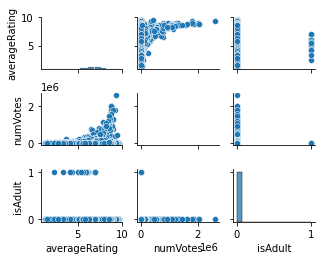

In [ ]:
# visualizing some relationships

sns.pairplot(new_complete_ratings, height=1.2, aspect=1.25)
plt.savefig('pariplot.png');

In [12]:
# checking for the missing values in the dataset

new_complete_ratings.isna().any()

averageRating     False
numVotes          False
primaryTitle      False
originalTitle     False
isAdult           False
startYear         False
runtimeMinutes    False
genres            False
dtype: bool

In [13]:
#Removing the duplicate values in the datset

new_complete_ratings.drop_duplicates(inplace=True)
new_complete_ratings.shape


(905, 8)

## 2. Features



In [18]:
new_complete_ratings.head()

,averageRating,numVotes,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
tconst,,,,,,,,
tt0000001,5.7,1892.0,Carmencita,Carmencita,0.0,1894.0,1,"Documentary,Short"
tt0000003,6.5,1686.0,Pauvre Pierrot,Pauvre Pierrot,0.0,1892.0,4,"Animation,Comedy,Romance"
tt0000005,6.2,2501.0,Blacksmith Scene,Blacksmith Scene,0.0,1893.0,1,"Comedy,Short"
tt0000008,5.4,2029.0,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0.0,1894.0,1,"Documentary,Short"
tt0000010,6.9,6835.0,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0.0,1895.0,1,"Documentary,Short"


In [65]:
# explode string into rows 

df = new_complete_ratings.explode('genres').drop_duplicates()
df.head()

,averageRating,numVotes,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
tconst,,,,,,,,
tt0000001,5.7,1892.0,Carmencita,Carmencita,0.0,1894.0,1,Documentary
tt0000001,5.7,1892.0,Carmencita,Carmencita,0.0,1894.0,1,Short
tt0000003,6.5,1686.0,Pauvre Pierrot,Pauvre Pierrot,0.0,1892.0,4,Animation
tt0000003,6.5,1686.0,Pauvre Pierrot,Pauvre Pierrot,0.0,1892.0,4,Comedy
tt0000003,6.5,1686.0,Pauvre Pierrot,Pauvre Pierrot,0.0,1892.0,4,Romance


In [66]:
# print list of all unique genres

print(df['genres'].unique())

['Documentary' 'Short' 'Animation' 'Comedy' 'Romance' 'Horror' 'Biography'
 'Fantasy' 'Drama' 'Family' 'Action' 'Adventure' 'Crime' 'Music' 'Sci-Fi'
 'Thriller' 'Mystery' 'History' 'War' 'Sport' 'Western' 'Musical'
 'Film-Noir']


In [67]:
X, Y = df[['genres']], df['averageRating']
X = pd.get_dummies(data=X, drop_first=True)

In [68]:
#train linear regression model, print the intercept of the slope

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 40)

regr = linear_model.LinearRegression() 
regr.fit(X_train, Y_train)
predicted = regr.predict(X_test)

intercept = regr.intercept_
print(intercept)

7.057142857142857


In [69]:
slope = regr.coef_
print(slope)

[-0.09594883 -0.02819549 -0.22589286 -0.14082238 -0.08553792 -0.63609023
 -0.08630952  0.08554007 -0.12097264  0.06507937  0.15285714 -0.17714286
 -0.36623377 -0.15016611 -0.23552124 -0.13464286 -0.15       -0.43159938
 -0.31168831  0.03785714  0.09285714 -0.7394958 ]


In [54]:
def calc(slope, intercept, genre):
    return slope*genre+intercept

score = calc(regr.coef_, regr.intercept_, 'genres_Action')
print(score)

UFuncTypeError: ignored